In [264]:
import pandas as pd

import warnings # Para remover warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

iris = pd.read_csv("Iris.csv") 
df = pd.read_csv('iris.data', header=None)
iris_ds = datasets.load_iris()
df.head()
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


![title](Petal-sepal.jpg)

In [265]:
# Conta quantos exemplos temos de cada especie
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

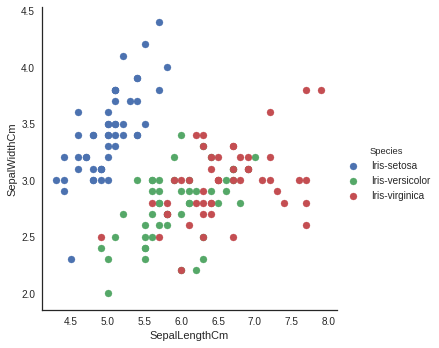

In [266]:
# Vou colorir cada ponto baseado na especie de cada planta.
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

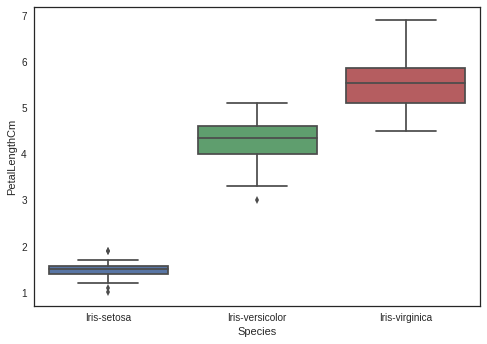

In [267]:
# Visualizamos individualmente as esperices baseado no comptrimento da petala. 
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
plt.show()

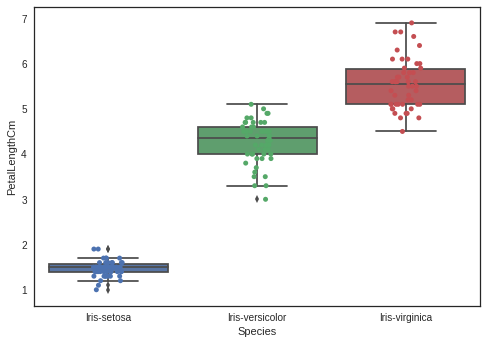

In [268]:
# Plotamos jutno com o bloxplot, a distribuicao de pontos.
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")
plt.show()

![title](PerceptronDiagram.png)

In [269]:
# Implementacao de um Perceptron.
import numpy as np

class Perceptron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):
      """Fit dados de treinamento
      X : Vetor de treinamento, X.shape : [#samples, #features]
      y : Valores alvos, y.shape : [#samples]
      """

      # pesos
      self.weight = np.zeros(1 + X.shape[1])

      # Número de classficações erradas.
      self.errors = []  

      for i in range(self.niter):
         err = 0
         for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
         self.errors.append(err)
      return self

   def net_input(self, X):
      """
          Calcula entrada para rede.
      """
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def predict(self, X):
      """
          Retorna o label da classe
      """
      return np.where(self.net_input(X) >= 0.0, 1, -1)

In [272]:
#Extraimos os labels de cada classe.
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [273]:
#Atribuimos -1 para Setosa e 1 para Versicolar
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [274]:
#Extraimos a coluna SepalLength e a terceira coluna PetalLength dos 100 exemplos de treinamento.
X = df.iloc[0:100, [0, 2]].values
X

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 4.8,  1.4],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,  1.7],
       [ 5.1,  1.5],
       [ 4.6,  1. ],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 5. ,  1.6],
       [ 5. ,  1.6],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 4.9,  1.5],
       [ 4.4,  1.3],
       [ 5.1,  1.5],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,

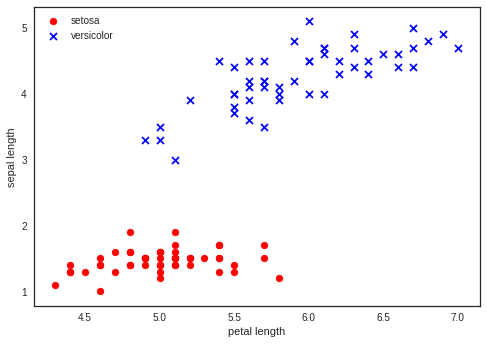

In [275]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

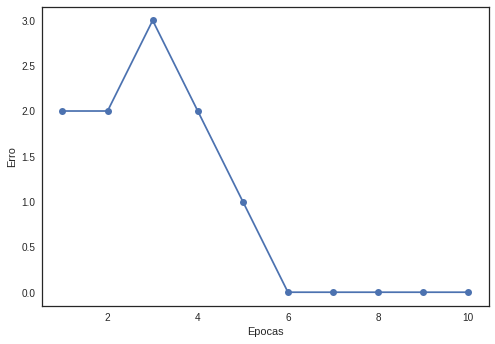

In [276]:
#Utilizamos a classe Perceptron
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Erro')
plt.show()

In [34]:
#Vamos olhar as bordas de decisão.
from matplotlib.colors import ListedColormap
def plot_regioes_decisao(X, y, classifier, resolution=0.02):
   # Define o mapa de core e os marcadores
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # Desenhamos a borda de decisão
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plota as classes
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

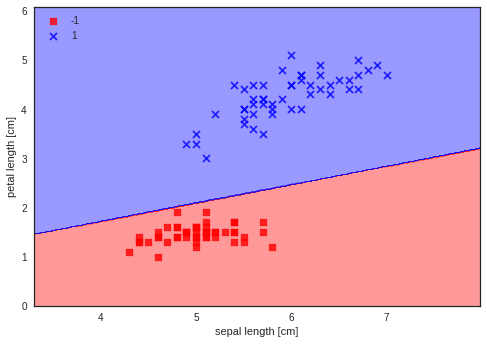

In [35]:
plot_regioes_decisao(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

** Regressão **

Aplicamos regressão aos dados da iris.

In [121]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [103]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [147]:
X = iris_ds.data[:, np.newaxis, 2] # Vamos pegar apenas uma feature PetalWidthCm
X[:5]

array([[ 1.4],
       [ 1.4],
       [ 1.3],
       [ 1.5],
       [ 1.4]])

In [148]:
# Dividimos em conjuntos de treino e teste
# X
X_train = X[:-20] #Retiro 20 linhas do treinamento
X_test  = X[-20:] #Pego as 20 para teste

# Y treinamento
Y_train = iris_ds.target[:-20]
Y_test  = iris_ds.target[-20:]

In [160]:
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [153]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train) #Realiza o treinamento.

In [154]:
predictions = lm.predict(X_test) #Testa para elementos não inclusos no treinamento.
predictions

array([ 1.9399036 ,  2.06584467,  1.73000182,  1.52010003,  1.73000182,
        1.9399036 ,  1.73000182,  1.68802146,  1.39415896,  1.6460411 ,
        1.73000182,  1.52010003,  1.52010003,  1.85594289,  1.77198217,
        1.56208039,  1.47811968,  1.56208039,  1.6460411 ,  1.52010003])

In [155]:
print('Coeficientes: ',lm.coef_)

('Coeficientes: ', array([ 0.41980357]))


In [156]:
print("Erro quadrático médio: %.2f"
      % mean_squared_error(Y_test, predictions))

Mean squared error: 0.13


In [157]:
# Variância: mais perto de 1 maior adequação
print('Variancia: %.2f' % r2_score(Y_test, predictions))

Variance score: 0.00


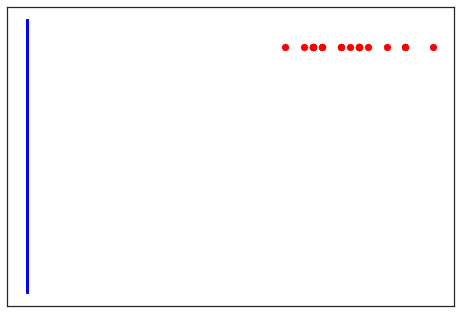

In [159]:
# Plot saida
plt.scatter(X_test, Y_test,  color='red')
plt.plot(Y_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [247]:
##### Dataset de casas de Boston
data_boston = datasets.load_boston()

*** Dataset Preço de casas de Boston ***

Variaveis
<ul>
        14 atributos:
        <li> CRIM - taxa de criminalidade por cidade </li>
        <li> ZN - Proporção de terrenos residenciais zoneados para lotes acima de 25,000 </li>
        <li> INDUS - proporção de acres não residenciais por cidade.</li>
        <li> CHAS - Variável simbólica do Rio Charles (1 se alcanca o rio, 0 caso contario)</li>
        <li> NOX - Concentração de óxido nítrico </li>
        <li> RM - número médio de quartos por casa.</li>
        <li> AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940</li>
        <li> DIS - distâncias ponderadas para cinco centros de emprego de Boston</li>
        <li> RAD - Índice de acessibilidade para rodovias</li>
        <li> TAX - taxa de imposto sobre o valor total para cada US 10.000</li>
        <li> PTRATIO - razão professor aluno por cidade</li>
        <li> B - 1000(Bk - 0.63)^2 onde Bk é a proporção de negros por cidade</li>
        <li> LSTAT - % lower status da população.</li>
        <li> MEDV - Valor médio das casas em $1000.</li>
</ul>        

In [251]:
# Definimos o dataset
df = pd.DataFrame(data_boston.data, columns=data_boston.feature_names)

# Variavel alvo - Valor dos imóveis.
target = pd.DataFrame(data_boston.target, columns=["MEDV"])


In [256]:
result = pd.concat([df, target], axis=1, join='inner')

In [259]:
result.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


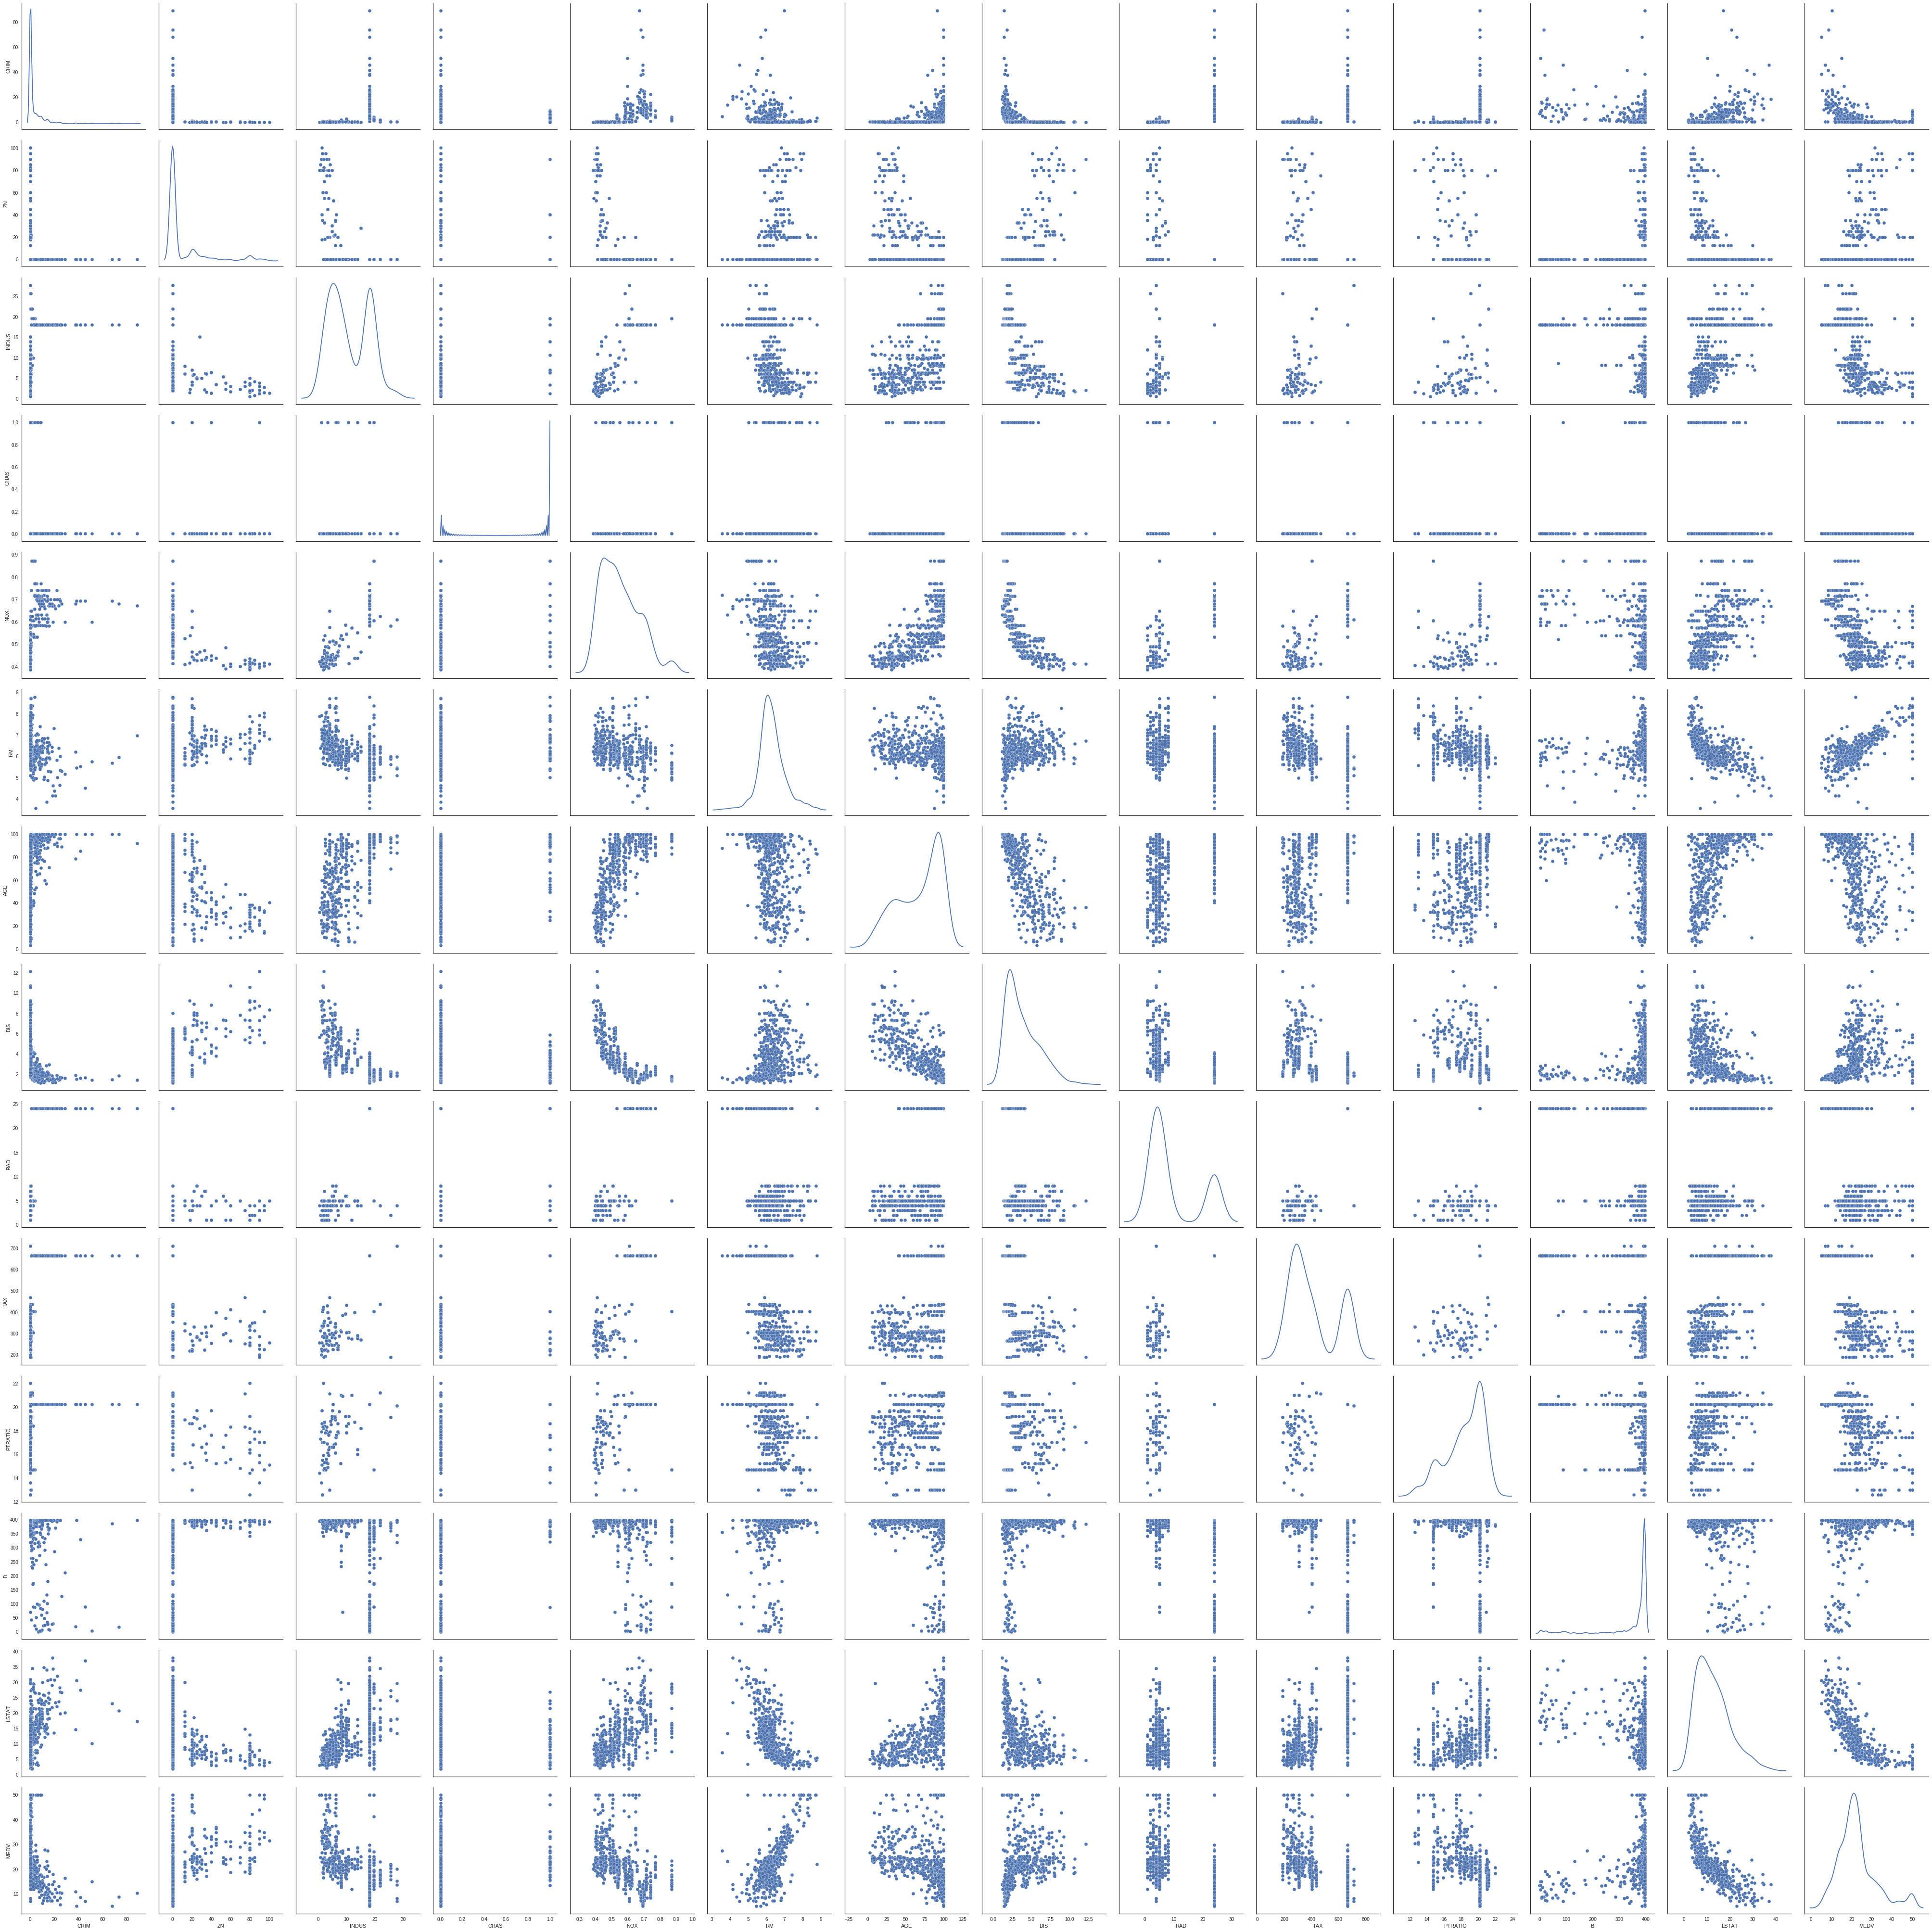

In [261]:
# Combinamos para cada atributo com todos os outros e mostramos a densidade de kernel na diagonal.
sns.pairplot(result, size=4, diag_kind="kde")
plt.show()

In [243]:
#Regressão todas as variaveis com preço dos imóveis.
min_error = 1000
for i in range(0,13):
    X = data_boston.data[:, np.newaxis, i] # Vamos pegar apenas uma feature taxa de criminalidade
    #Separar em conjunto de treinamento e teste
    #X
    X_train = X[:-20]
    X_test = X[-20:]

    #Y Preço dos imóveis
    Y_train = target[:-20]
    Y_test  = target[-20:]
    #Aplicamos os modelo
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, Y_train)
    #Fazemos a predição
    predictions = lm.predict(X_test)
    #Calculamos o erro
    error = mean_squared_error(Y_test, predictions)
    print(error, i)
    if(error < min_error):
        min_error = error
        
print("Erro minimo:", min_error)


(55.987316198544406, 0)
(30.555206927150959, 1)
(18.564535569679457, 2)
(38.504265785320641, 3)
(31.061850483457469, 4)
(18.729140057373769, 5)
(27.003624948039352, 6)
(29.556480327670176, 7)
(67.818497081793595, 8)
(27.404627817378959, 9)
(25.324770575359928, 10)
(49.057230558508891, 11)
(25.333280164742593, 12)
('Erro minimo:', 18.564535569679457)


In [239]:
#Para o menor erro, temos:
i = 2
X = data_boston.data[:, np.newaxis, i] 
X_train = X[:-20]
X_test = X[-20:]
Y_train = target[:-20]
Y_test  = target[-20:]
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)
print('Variance score: %.2f' % r2_score(Y_test, predictions))

Variance score: 0.21


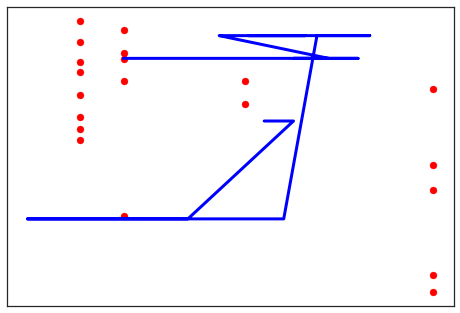

In [240]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='red')
plt.plot(Y_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [195]:
#Regressão com todas as variáveis.
#Vamos dividir em 2 conjuntos
#X
X_train = df[:-20]
X_test  = df[-20:] 
#Y 
Y_train = target[:-20]
Y_test  = target[-20:]


In [196]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

In [197]:
predictions = lm.predict(X_test)
print(predictions)[0:5]

[[ 19.5269757 ]
 [ 21.12968176]
 [ 10.69775784]
 [  6.94896365]
 [  2.24965466]]


In [198]:
print('Coeficientes: ',lm.coef_)

('Coeficientes: ', array([[ -1.01939810e-01,   4.94888480e-02,   2.33211595e-02,
          2.59303688e+00,  -1.68214723e+01,   3.76487853e+00,
          6.86236795e-03,  -1.45762710e+00,   3.50148357e-01,
         -1.56920780e-02,  -9.03727306e-01,   9.04441274e-03,
         -5.52819289e-01]]))


In [199]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))

Mean squared error: 17.89


In [200]:
#Variancia mais perto de 1 melhor.
print('Variance score: %.2f' % r2_score(Y_test, predictions))

Variance score: 0.23
